In [1]:
import math
import random

In [2]:
kB = 0.001985875
T = 300.0
kT = kB * T
print(kT)

0.5957625


## MC

In [259]:
# from numba import jit

# @jit
def basepair_MC(Ubps_input, verbose=False, shuffle="original"):
    Ubps = Ubps_input.copy()
    idx = list(range(len(Ubps)))

    # Shuffle must be one of these options
    assert shuffle in ('No', 'original', 'Fisher-Yates')
    
    while len(Ubps) > 1:
        if verbose:
            print('################################')
        nbp_seq = 0
        bp_seq = []
        for ibp in range(len(Ubps)):
            nbp_seq += 1
            bp_seq.append(ibp)
        if verbose:
            print(nbp_seq)
            print(bp_seq)

        
        # Shuffle
        if shuffle == 'No':
            if verbose:
                print('No shuffle', bp_seq)
            pass
        elif shuffle == 'original':
            for i in range(nbp_seq):
                i_swap = random.randint(0, nbp_seq-1)
                i_save = bp_seq[i]
                bp_seq[i] = bp_seq[i_swap]
                bp_seq[i_swap] = i_save
                if verbose:
                    print('Shuffle', i, i_swap, bp_seq)
        elif shuffle == 'Fisher-Yates':
            for i in range(nbp_seq-1, 0, -1):
                i_swap = random.randint(0, i)
                i_save = bp_seq[i]
                bp_seq[i] = bp_seq[i_swap]
                bp_seq[i_swap] = i_save
                if verbose:
                    print('Shuffle', i, i_swap, bp_seq)

        ibp_delete = bp_seq[0]
        if verbose:
            print('ibp_delete = ', ibp_delete)
        for i in range(1, nbp_seq):
            jbp = bp_seq[i]
            if verbose:
                print('################', i)
                print('ibp_delete, jbp = ', ibp_delete, jbp)
            ratio = math.exp((Ubps[jbp] - Ubps[ibp_delete]) / kT)
            #rnd = random.random()
            rnd = random.uniform(0, 1.0)
            if rnd < ratio:
                ibp_delete = jbp
            if verbose:
                print('ratio = ', ratio)
                print('rnd = ', rnd)
                print('swap = ', rnd < ratio)
                print('new ibp_delete = ', ibp_delete)
        
        idx.pop(ibp_delete)
        Ubps.pop(ibp_delete)
        if verbose:
            print('idx: ', idx)
            print('Ubps: ', Ubps)

    assert len(idx) == 1
    assert len(Ubps) == 1
        
    return idx[0], Ubps[0]

In [210]:
def basepair_MC2(Ubps_input, verbose=False):
    Ubps = Ubps_input.copy()
    idx = list(range(len(Ubps)))
    
    while len(Ubps) > 1:
        if verbose:
            print('################################')
            print('Ubps = ', Ubps)

        N = len(Ubps)
        Z = 0.0
        for Ubp in Ubps:
            Z += math.exp(-Ubp / kT)
        prob = []
        for Ubp in Ubps:
            prob.append((1.0 - math.exp(-Ubp / kT) / Z) / (N-1))

        cum = []
        s = 0.0
        for p in prob:
            s += p
            cum.append(s) 

        if verbose:
            print('prob = ', prob)
            print('cum = ', cum)
            
        r = random.random()
        if verbose:
            print('r = ', r)
        for ic, c in enumerate(cum):
            if r < c:
                ibp_delete = ic
                if verbose:
                    print('ibp_delte =', ibp_delete)
                break
                
        idx_remove = idx.pop(ibp_delete)
        Ubp_remove = Ubps.pop(ibp_delete)
        if verbose:
            print('idx_remove = ', idx_remove)
            print('Ubp_remove = ', Ubp_remove)
            print('idx: ', idx)
            print('Ubps: ', Ubps)

    assert len(idx) == 1
    assert len(Ubps) == 1
        
    return idx[0], Ubps[0]

In [160]:
Ubps = [-5.0, -7.0, -0.5, -2.1, -1.0, -3.0, -0.9, -3.3, -6.5]
print(basepair_MC(Ubps))

(8, -6.5)


In [186]:
print(basepair_MC(Ubps, verbose=True, shuffle='Fisher-Yates')) 

################################
9
[0, 1, 2, 3, 4, 5, 6, 7, 8]
Shuffle 8 0 [8, 1, 2, 3, 4, 5, 6, 7, 0]
Shuffle 7 3 [8, 1, 2, 7, 4, 5, 6, 3, 0]
Shuffle 6 1 [8, 6, 2, 7, 4, 5, 1, 3, 0]
Shuffle 5 1 [8, 5, 2, 7, 4, 6, 1, 3, 0]
Shuffle 4 1 [8, 4, 2, 7, 5, 6, 1, 3, 0]
Shuffle 3 2 [8, 4, 7, 2, 5, 6, 1, 3, 0]
Shuffle 2 1 [8, 7, 4, 2, 5, 6, 1, 3, 0]
Shuffle 1 1 [8, 7, 4, 2, 5, 6, 1, 3, 0]
ibp_delete =  8
################ 1
ibp_delete, jbp =  8 7
ratio =  215.13546790092735
rnd =  0.709414027078058
swap =  True
new ibp_delete =  7
################ 2
ibp_delete, jbp =  7 4
ratio =  47.4937827236931
rnd =  0.9778437325314585
swap =  True
new ibp_delete =  4
################ 3
ibp_delete, jbp =  4 2
ratio =  2.314654914465859
rnd =  0.7846673199676594
swap =  True
new ibp_delete =  2
################ 4
ibp_delete, jbp =  2 5
ratio =  0.015051117214711494
rnd =  0.6948506046351149
swap =  False
new ibp_delete =  2
################ 5
ibp_delete, jbp =  2 6
ratio =  0.5109883491577271
rnd =  0.0184752

In [217]:
print(basepair_MC2(Ubps, verbose=True)) 

################################
Ubps =  [-5.0, -7.0, -0.5, -2.1, -1.0, -3.0, -0.9, -3.3, -6.5]
prob =  [0.12203848775937913, 0.03999224602354874, 0.12499844712227502, 0.1249772231706457, 0.1249964056239423, 0.12489682641475533, 0.12499696103105376, 0.1248292894844889, 0.08827411336991112]
cum =  [0.12203848775937913, 0.16203073378292787, 0.2870291809052029, 0.4120064040758486, 0.5370028096997909, 0.6618996361145462, 0.7868965971455999, 0.9117258866300888, 0.9999999999999999]
r =  0.11651868692815326
ibp_delte = 0
idx_remove =  0
Ubp_remove =  -5.0
idx:  [1, 2, 3, 4, 5, 6, 7, 8]
Ubps:  [-7.0, -0.5, -2.1, -1.0, -3.0, -0.9, -3.3, -6.5]
################################
Ubps =  [-7.0, -0.5, -2.1, -1.0, -3.0, -0.9, -3.3, -6.5]
prob =  [0.04334783987624418, 0.1428553250726138, 0.14283048050803776, 0.14285293531324925, 0.1427363687974426, 0.14285358546775806, 0.14265731068166007, 0.09986615428299427]
cum =  [0.04334783987624418, 0.186203164948858, 0.32903364545689573, 0.471886580770145, 0.614

## Test

### General case

In [310]:
kT = 0.6

In [332]:
Ubps = [-5.0, -7.0, -0.5, -2.1, -1.0, -3.0, -0.9, -3.3, -6.5]
#Ubps = [-5.0,  -0.5, -6.5, -2.1, -1.0,  -3.0, -0.9, -3.3, -7.0]
#Ubps = [-0.5, -2.1, -5.0,  -7.0, -1.0,  -3.0, -0.9, -3.3, -6.5]
#Ubps = [-7.0, -6.5, -0.5, -2.1, -5.0,  -1.0,  -3.0, -0.9, -3.3]

In [333]:
# Analytical

Z = 0.0
for Ubp in Ubps:
    Z += math.exp(-Ubp / kT)

probs_analytical = []
for Ubp in Ubps:
    p =  math.exp(-Ubp / kT) / Z
    probs_analytical.append(p)
    print(Ubp, p)

-5.0 0.024201664389782628
-7.0 0.6784119779975977
-0.5 1.338556230555217e-05
-2.1 0.00019264388958790805
-1.0 3.079985615111932e-05
-3.0 0.0008633700144335401
-0.9 2.607151536118227e-05
-3.3 0.0014234565072812544
-6.5 0.2948366302674992


In [334]:
Ntrial = 100000

idx_chosen = []
for i in range(Ntrial):
    idx, _ = basepair_MC(Ubps)
    idx_chosen.append(idx)

In [335]:
idx_chosen_noshuffle = []
for i in range(Ntrial):
    idx, _ = basepair_MC(Ubps, shuffle='No')
    idx_chosen_noshuffle.append(idx)

In [336]:
idx_chosen_Fisher = []
for i in range(Ntrial):
    idx, _ = basepair_MC(Ubps, shuffle='Fisher-Yates')
    idx_chosen_Fisher.append(idx)

In [337]:
idx_chosen_alg2 = []
for i in range(Ntrial):
    idx, _ = basepair_MC2(Ubps)
    idx_chosen_alg2.append(idx)

[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5] [0.00125 0.77545 0.      0.      0.      0.      0.      0.      0.2233 ]
[-0.5  0.5  1.5] [0.00455 0.99545]
[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5] [0.00153 0.77415 0.      0.      0.      0.      0.      0.      0.22432]
[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5] [2.3780e-02 6.7880e-01 0.0000e+00 1.6000e-04 1.0000e-05 9.6000e-04
 2.0000e-05 1.3300e-03 2.9494e-01]
[0.024201664389782628, 0.6784119779975977, 1.338556230555217e-05, 0.00019264388958790805, 3.079985615111932e-05, 0.0008633700144335401, 2.607151536118227e-05, 0.0014234565072812544, 0.2948366302674992]


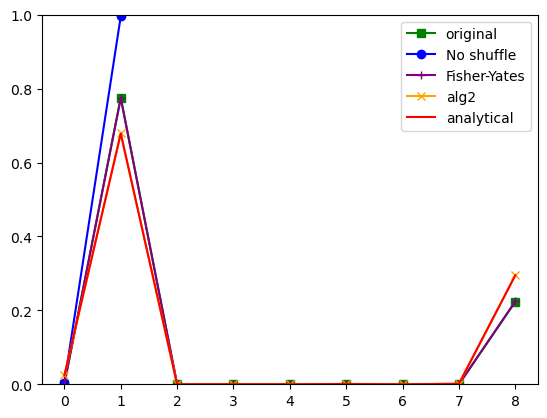

In [338]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,1)

hist, bins = np.histogram(idx_chosen, bins=np.arange(min(idx_chosen), max(idx_chosen) + 2) - 0.5, density=True)
#ax.plot([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)], hist)
print(bins, hist)
ax.plot([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)], hist, color='green', marker='s', label='original')

hist, bins = np.histogram(idx_chosen_noshuffle, bins=np.arange(min(idx_chosen_noshuffle), max(idx_chosen_noshuffle) + 2) - 0.5, density=True)
print(bins, hist)
ax.plot([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)], hist, color='blue', marker='o', label='No shuffle')

hist, bins = np.histogram(idx_chosen_Fisher, bins=np.arange(min(idx_chosen_Fisher), max(idx_chosen_Fisher) + 2) - 0.5, density=True)
print(bins, hist)
ax.plot([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)], hist, color='purple', marker='+', label='Fisher-Yates')

hist, bins = np.histogram(idx_chosen_alg2, bins=np.arange(min(idx_chosen_alg2), max(idx_chosen_alg2) + 2) - 0.5, density=True)
print(bins, hist)
ax.plot([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)], hist, color='orange', marker='x', label='alg2')

print(probs_analytical)
ax.plot(probs_analytical, color='red', label='analytical')

ax.set_ylim(0,1)
ax.legend()

### Case of only two base pairs

In [285]:
Ubps = [-5.0, -7.0]

In [286]:
Z = 0.0
for Ubp in Ubps:
    Z += math.exp(-Ubp / kT)

probs_analytical = []
for Ubp in Ubps:
    p =  math.exp(-Ubp / kT) / Z
    probs_analytical.append(p)
    print(Ubp, p)

-5.0 0.03366530571385086
-7.0 0.966334694286149


In [287]:
Ntrial = 10000000

idx_chosen = []
for i in range(Ntrial):
    idx, _ = basepair_MC(Ubps)
    idx_chosen.append(idx)

In [288]:
idx_chosen_noshuffle = []
for i in range(Ntrial):
    idx, _ = basepair_MC(Ubps, shuffle='No')
    idx_chosen_noshuffle.append(idx)

In [289]:
idx_chosen_Fisher = []
for i in range(Ntrial):
    idx, _ = basepair_MC(Ubps, shuffle='Fisher-Yates')
    idx_chosen_Fisher.append(idx)

In [290]:
idx_chosen_alg2 = []
for i in range(Ntrial):
    idx, _ = basepair_MC2(Ubps)
    idx_chosen_alg2.append(idx)

[-0.5  0.5  1.5] [0.0174113 0.9825887]
[-0.5  0.5  1.5] [0.0347271 0.9652729]
[-0.5  0.5  1.5] [0.0174083 0.9825917]
[-0.5  0.5  1.5] [0.0337649 0.9662351]
[0.03366530571385086, 0.966334694286149]


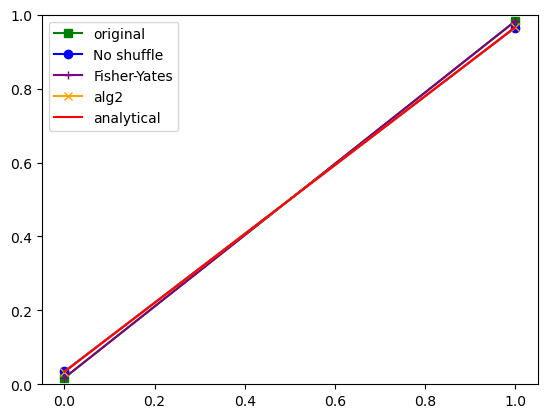

In [291]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,1)

hist, bins = np.histogram(idx_chosen, bins=np.arange(min(idx_chosen), max(idx_chosen) + 2) - 0.5, density=True)
#ax.plot([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)], hist)
print(bins, hist)
ax.plot([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)], hist, color='green', marker='s', label='original')

hist, bins = np.histogram(idx_chosen_noshuffle, bins=np.arange(min(idx_chosen_noshuffle), max(idx_chosen_noshuffle) + 2) - 0.5, density=True)
print(bins, hist)
ax.plot([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)], hist, color='blue', marker='o', label='No shuffle')

hist, bins = np.histogram(idx_chosen_Fisher, bins=np.arange(min(idx_chosen_Fisher), max(idx_chosen_Fisher) + 2) - 0.5, density=True)
print(bins, hist)
ax.plot([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)], hist, color='purple', marker='+', label='Fisher-Yates')

hist, bins = np.histogram(idx_chosen_alg2, bins=np.arange(min(idx_chosen_alg2), max(idx_chosen_alg2) + 2) - 0.5, density=True)
print(bins, hist)
ax.plot([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)], hist, color='orange', marker='x', label='alg2')

print(probs_analytical)
ax.plot(probs_analytical, color='red', label='analytical')

ax.set_ylim(0,1)
ax.legend()

### swap

In [292]:
Ubps = [-7.0, -5.0]

In [293]:
Z = 0.0
for Ubp in Ubps:
    Z += math.exp(-Ubp / kT)

probs_analytical = []
for Ubp in Ubps:
    p =  math.exp(-Ubp / kT) / Z
    probs_analytical.append(p)
    print(Ubp, p)

-7.0 0.966334694286149
-5.0 0.03366530571385086


In [294]:
Ntrial = 10000000

idx_chosen = []
for i in range(Ntrial):
    idx, _ = basepair_MC(Ubps)
    idx_chosen.append(idx)

In [295]:
idx_chosen_noshuffle = []
for i in range(Ntrial):
    idx, _ = basepair_MC(Ubps, shuffle='No')
    idx_chosen_noshuffle.append(idx)

In [296]:
idx_chosen_Fisher = []
for i in range(Ntrial):
    idx, _ = basepair_MC(Ubps, shuffle='Fisher-Yates')
    idx_chosen_Fisher.append(idx)

In [297]:
idx_chosen_alg2 = []
for i in range(Ntrial):
    idx, _ = basepair_MC2(Ubps)
    idx_chosen_alg2.append(idx)

[-0.5  0.5  1.5] [0.9825714 0.0174286]
[-0.5  0.5] [1.]
[-0.5  0.5  1.5] [0.9826034 0.0173966]
[-0.5  0.5  1.5] [0.9662243 0.0337757]
[0.966334694286149, 0.03366530571385086]


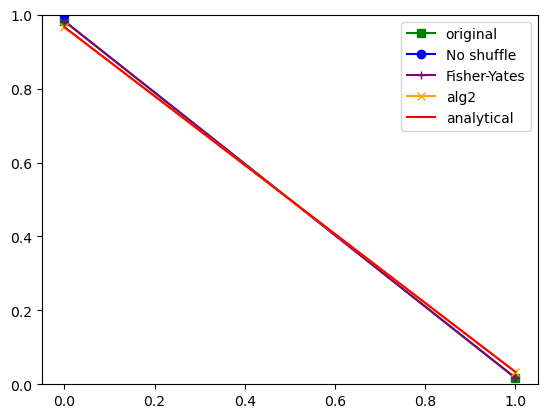

In [298]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,1)

hist, bins = np.histogram(idx_chosen, bins=np.arange(min(idx_chosen), max(idx_chosen) + 2) - 0.5, density=True)
#ax.plot([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)], hist)
print(bins, hist)
ax.plot([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)], hist, color='green', marker='s', label='original')

hist, bins = np.histogram(idx_chosen_noshuffle, bins=np.arange(min(idx_chosen_noshuffle), max(idx_chosen_noshuffle) + 2) - 0.5, density=True)
print(bins, hist)
ax.plot([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)], hist, color='blue', marker='o', label='No shuffle')

hist, bins = np.histogram(idx_chosen_Fisher, bins=np.arange(min(idx_chosen_Fisher), max(idx_chosen_Fisher) + 2) - 0.5, density=True)
print(bins, hist)
ax.plot([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)], hist, color='purple', marker='+', label='Fisher-Yates')

hist, bins = np.histogram(idx_chosen_alg2, bins=np.arange(min(idx_chosen_alg2), max(idx_chosen_alg2) + 2) - 0.5, density=True)
print(bins, hist)
ax.plot([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)], hist, color='orange', marker='x', label='alg2')

print(probs_analytical)
ax.plot(probs_analytical, color='red', label='analytical')

ax.set_ylim(0,1)
ax.legend()